In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import gridspec
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.nddata import Cutout2D
from astropy.io import fits
from astropy.wcs import WCS
from matplotlib import colors
from radio_beam import Beam
import os, sys
from astropy.visualization.wcsaxes import add_scalebar

In [2]:
impath = '../vdDussen_MSc_plots/'

#### VLBI image

In [3]:
hdu = fits.open(impath+"Natural.clean.image.fits")
c = SkyCoord("12h36m49.6425s","+62d07m37.984s")
cutout = Cutout2D(data=hdu[0].data.squeeze(),position=c,size=0.5*u.arcsecond,wcs=WCS(hdu[0].header,naxis=2))
beam = Beam.from_fits_header(hdu[0].header) 
hdu.close()

Set OBSGEO-B to    -0.000000 from OBSGEO-[XYZ].
Set OBSGEO-H to -6378140.000 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
/var/folders/95/2mdwxkv53dg0z1fx0__lvyxw0000gq/T/ipykernel_35568/1771070045.py:20: SyntaxWarning: invalid escape sequence '\m'
  cax.set_xlabel('Peak brightness ($\mathrm{\mu Jy\,beam^{-1}}$)')


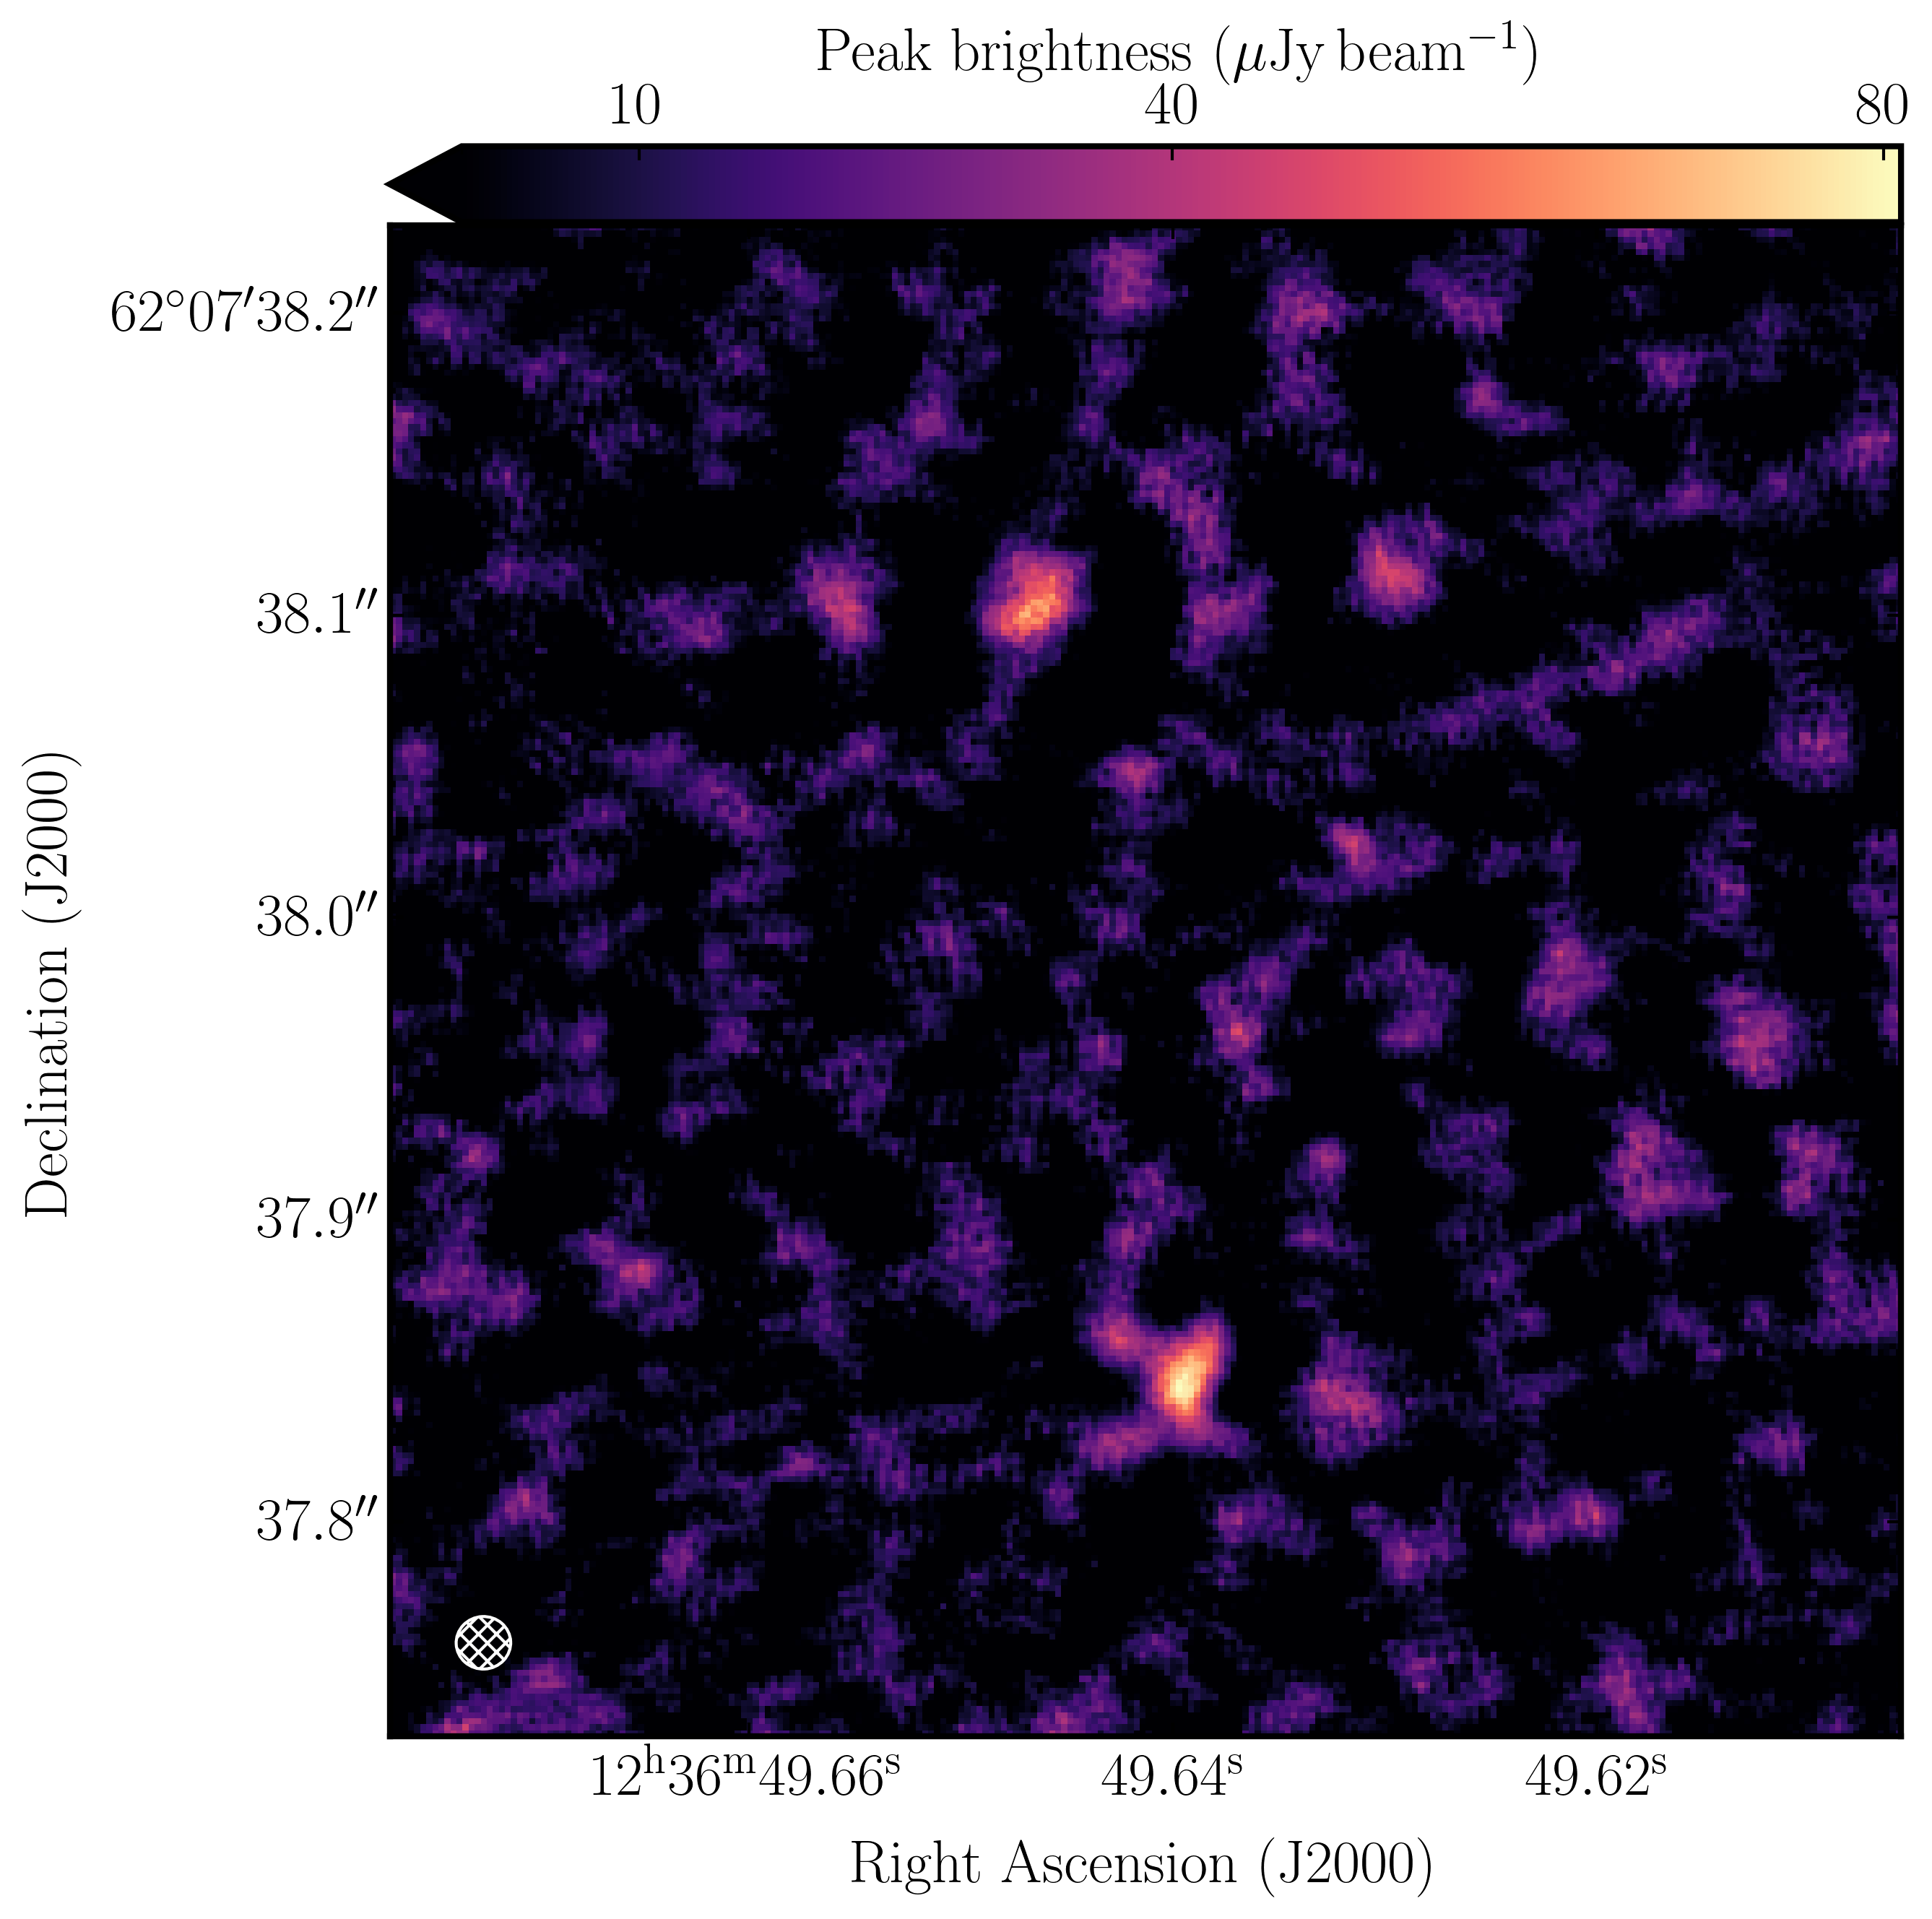

In [4]:
fig = plt.figure(figsize=(9,9.55))
gs = gridspec.GridSpec(nrows=2,ncols=1,height_ratios=[1/20,1],hspace=0,wspace=0)

ax = fig.add_subplot(gs[1],projection=cutout.wcs)
im = ax.imshow(cutout.data*1e6,norm=colors.SymLogNorm(linthresh=80,vmin=0, base=10))

## add the beam info
ycen_pix, xcen_pix = 15, 15
pixscale = hdu[0].header['CDELT2'] * u.deg
ellipse_artist = beam.ellipse_to_plot(xcen_pix, ycen_pix, pixscale,fill=False,hatch='xxxx',ec='w')
ax.add_artist(ellipse_artist)

## add the labels
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)')

## add the colourbar
cax = fig.add_subplot(gs[0])
cb = plt.colorbar(mappable=im,cax=cax,location='top',extend='min')
cax.set_xlabel('Peak brightness ($\mathrm{\mu Jy\,beam^{-1}}$)')
cax.set_xticks([10,40,80])
cax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
fig.savefig('VLBI_only.pdf',dpi=150)
plt.show()

#### e-MERLIN plots

##### Robust 1.75

In [5]:
hdu = fits.open(impath+"eMerlin_34mas_1.75.clean.image.fits")
c = SkyCoord("12h36m49.6425s","+62d07m37.984s")
cutout = Cutout2D(data=hdu[0].data.squeeze(),position=c,size=1.5*u.arcsecond,wcs=WCS(hdu[0].header,naxis=2))
beam = Beam.from_fits_header(hdu[0].header) 
hdu.close()

### vlbi positions
vn = SkyCoord("12h36m49.6472s","62d07m38.102s")
vs = SkyCoord("12h36m49.6404s","62d07m37.843s")
vs_p = SkyCoord("12h36m49.6399s", "+62d07m37.844s")
print(vn.separation(vs).to(u.arcsec).value)
print(vs_p.separation(vs).to(u.milliarcsecond).value)

0.26335329193471757
3.64614086247876


Set OBSGEO-B to    53.046554 from OBSGEO-[XYZ].
Set OBSGEO-H to    -6835.286 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
/var/folders/95/2mdwxkv53dg0z1fx0__lvyxw0000gq/T/ipykernel_35568/1224058381.py:24: SyntaxWarning: invalid escape sequence '\m'
  cax.set_xlabel('Peak brightness ($\mathrm{\mu Jy\,beam^{-1}}$)')


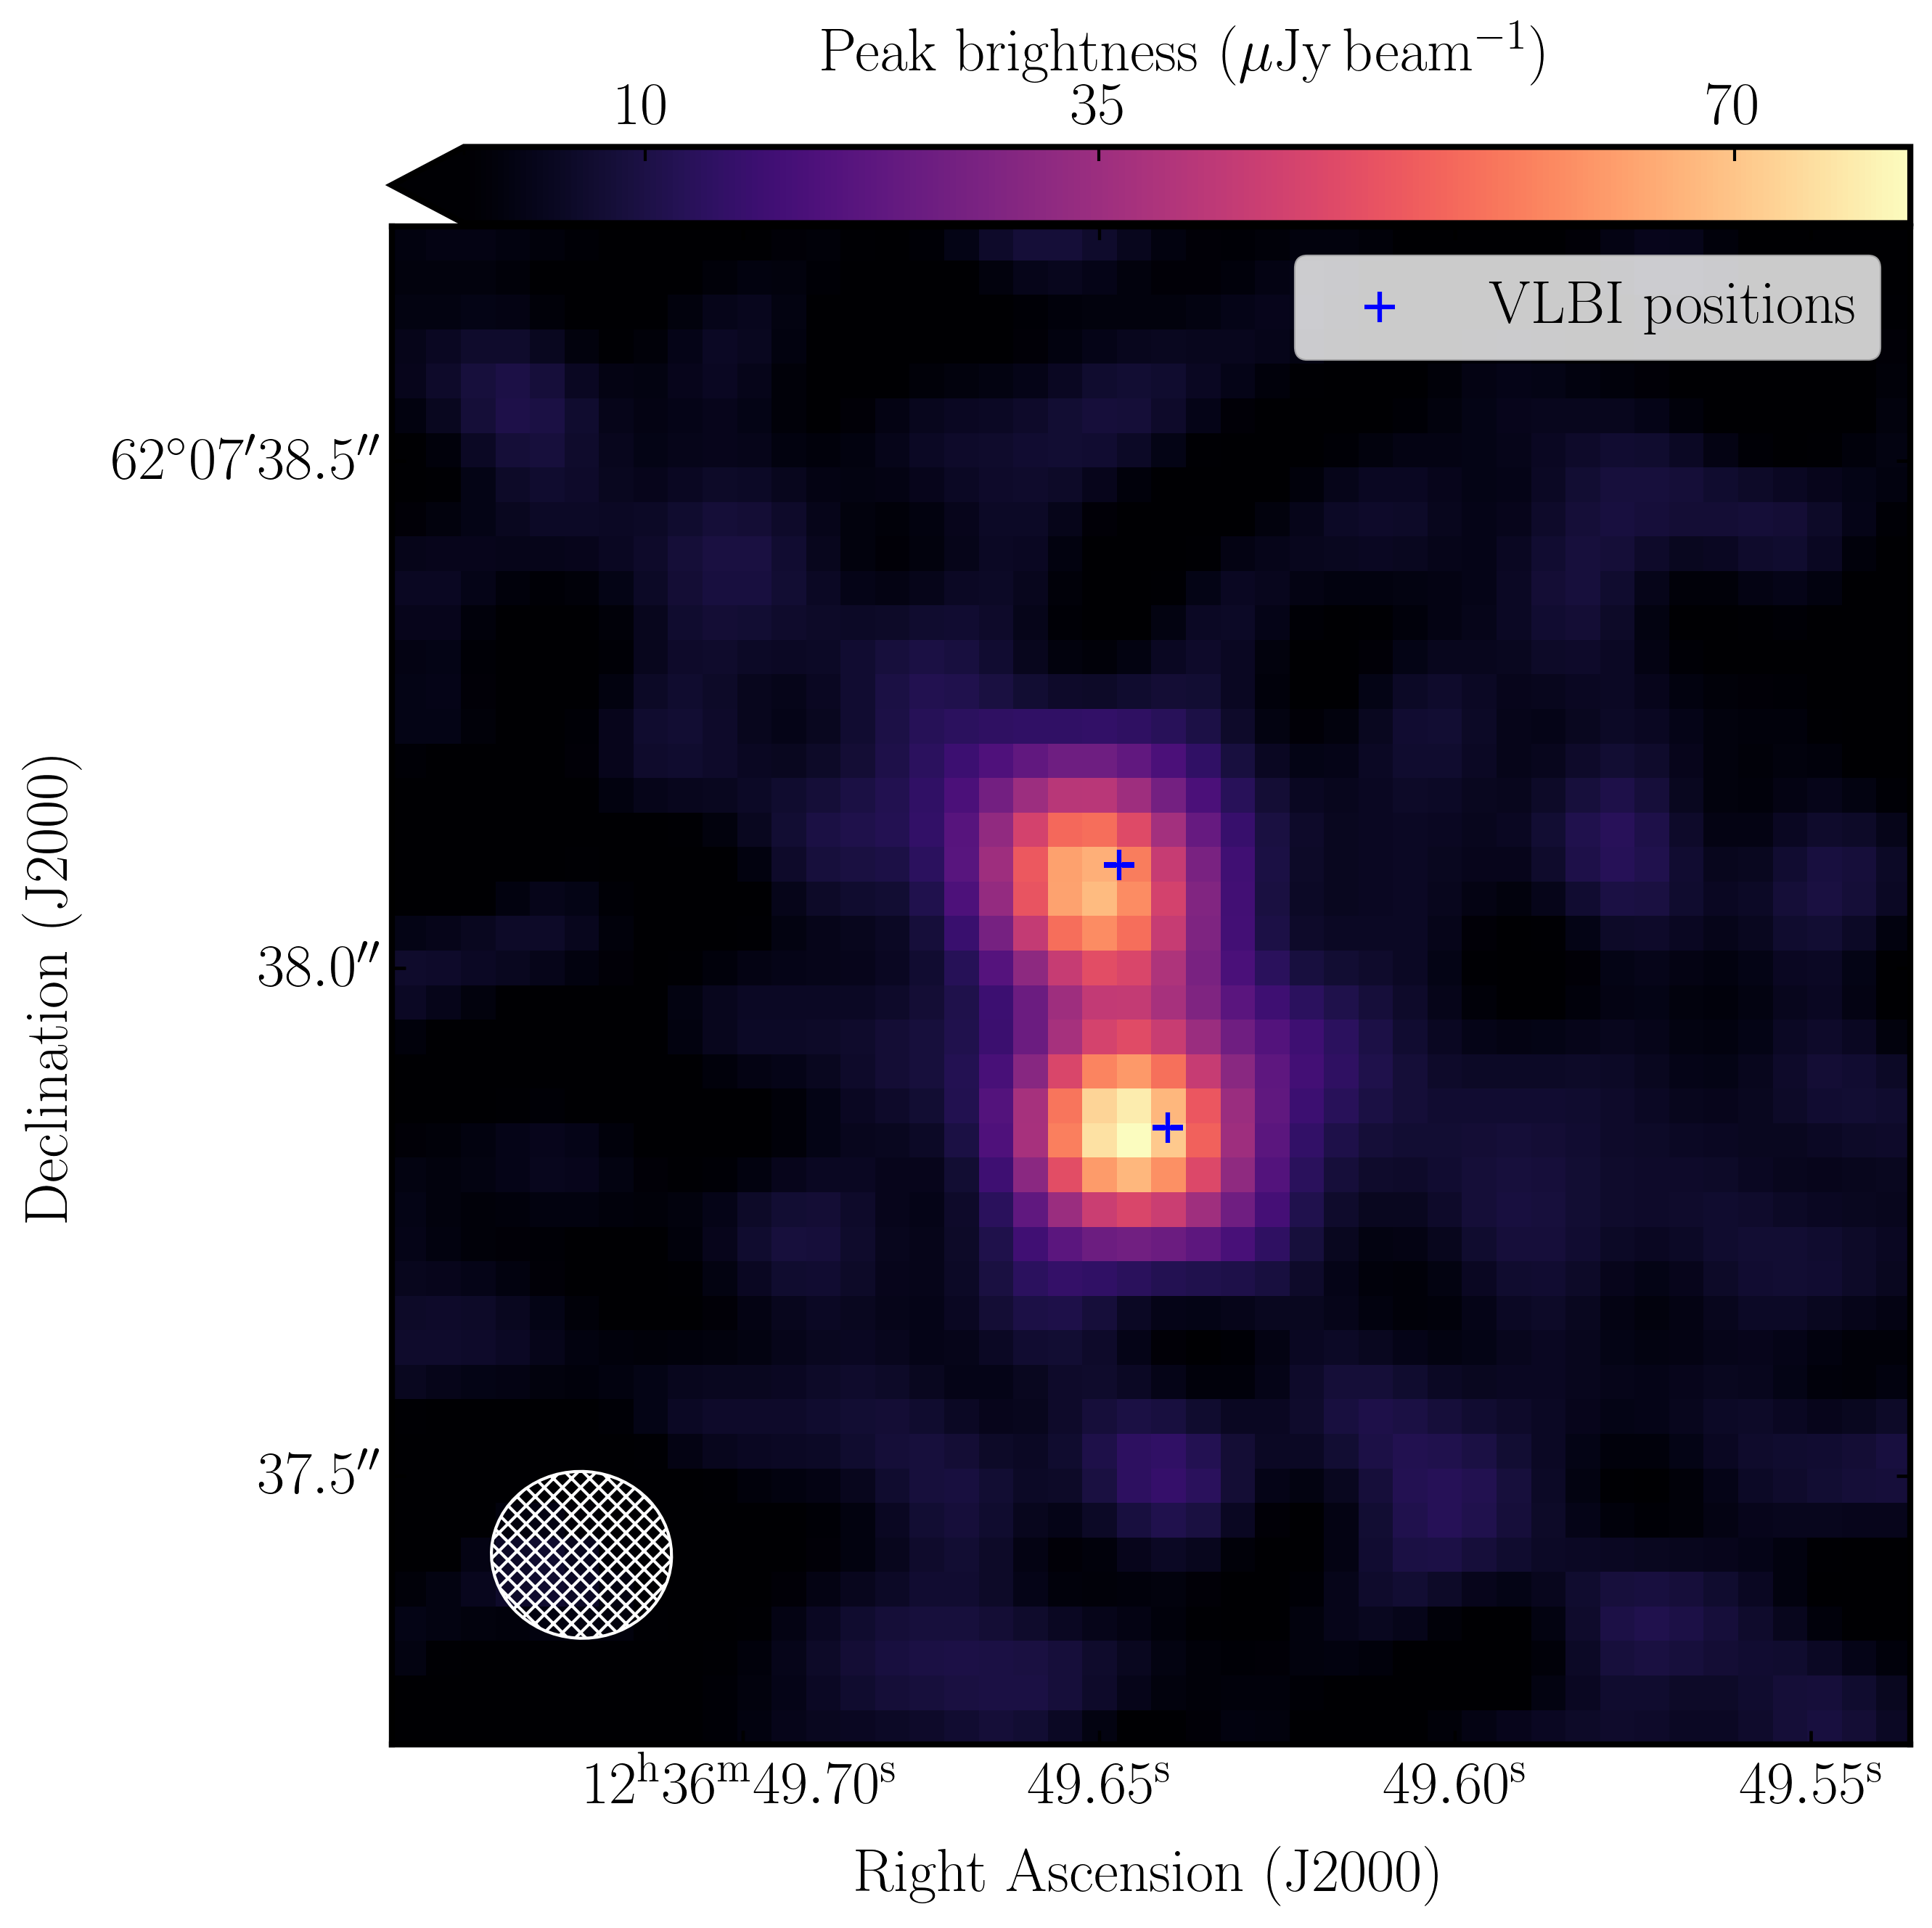

In [6]:
fig = plt.figure(figsize=(9,9.55))
gs = gridspec.GridSpec(nrows=2,ncols=1,height_ratios=[1/20,1],hspace=0,wspace=0)

ax = fig.add_subplot(gs[1],projection=cutout.wcs)
im = ax.imshow(cutout.data*1e6,norm=colors.SymLogNorm(linthresh=100,vmin=0, base=10))

## add the beam info
ycen_pix, xcen_pix = 5, 5
pixscale = hdu[0].header['CDELT2'] * u.deg
ellipse_artist = beam.ellipse_to_plot(xcen_pix, ycen_pix, pixscale,fill=False,hatch='xxxx',ec='w')
ax.add_artist(ellipse_artist)

## add the VLBI locations
ax.scatter(vn.ra.deg,vn.dec.deg,transform=ax.get_transform('world'),c='b',marker='+',s=100)
ax.scatter(vs.ra.deg,vs.dec.deg,transform=ax.get_transform('world'),c='b',marker='+',s=100,label='VLBI positions')
ax.legend(facecolor="w")
## add the labels
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)')

## add the colourbar
cax = fig.add_subplot(gs[0])
cb = plt.colorbar(mappable=im,cax=cax,location='top',extend='min')
cax.set_xlabel('Peak brightness ($\mathrm{\mu Jy\,beam^{-1}}$)')
cax.set_xticks([10,35,70])
cax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
fig.savefig('emerlinR1.75_VLBI.pdf',dpi=150)
plt.show()

##### Robust 0.25

In [7]:
hdu = fits.open(impath+"eMerlin_34mas_0.25.clean.image.fits")
c = SkyCoord("12h36m49.6425s","+62d07m37.984s")
cutout_em = Cutout2D(data=hdu[0].data.squeeze(),position=c,size=1.5*u.arcsecond,wcs=WCS(hdu[0].header,naxis=2))
beam = Beam.from_fits_header(hdu[0].header) 
hdu.close()

Set OBSGEO-B to    53.046554 from OBSGEO-[XYZ].
Set OBSGEO-H to    -6835.286 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
/var/folders/95/2mdwxkv53dg0z1fx0__lvyxw0000gq/T/ipykernel_35568/2512711207.py:24: SyntaxWarning: invalid escape sequence '\m'
  cax.set_xlabel('Peak brightness ($\mathrm{\mu Jy\,beam^{-1}}$)')


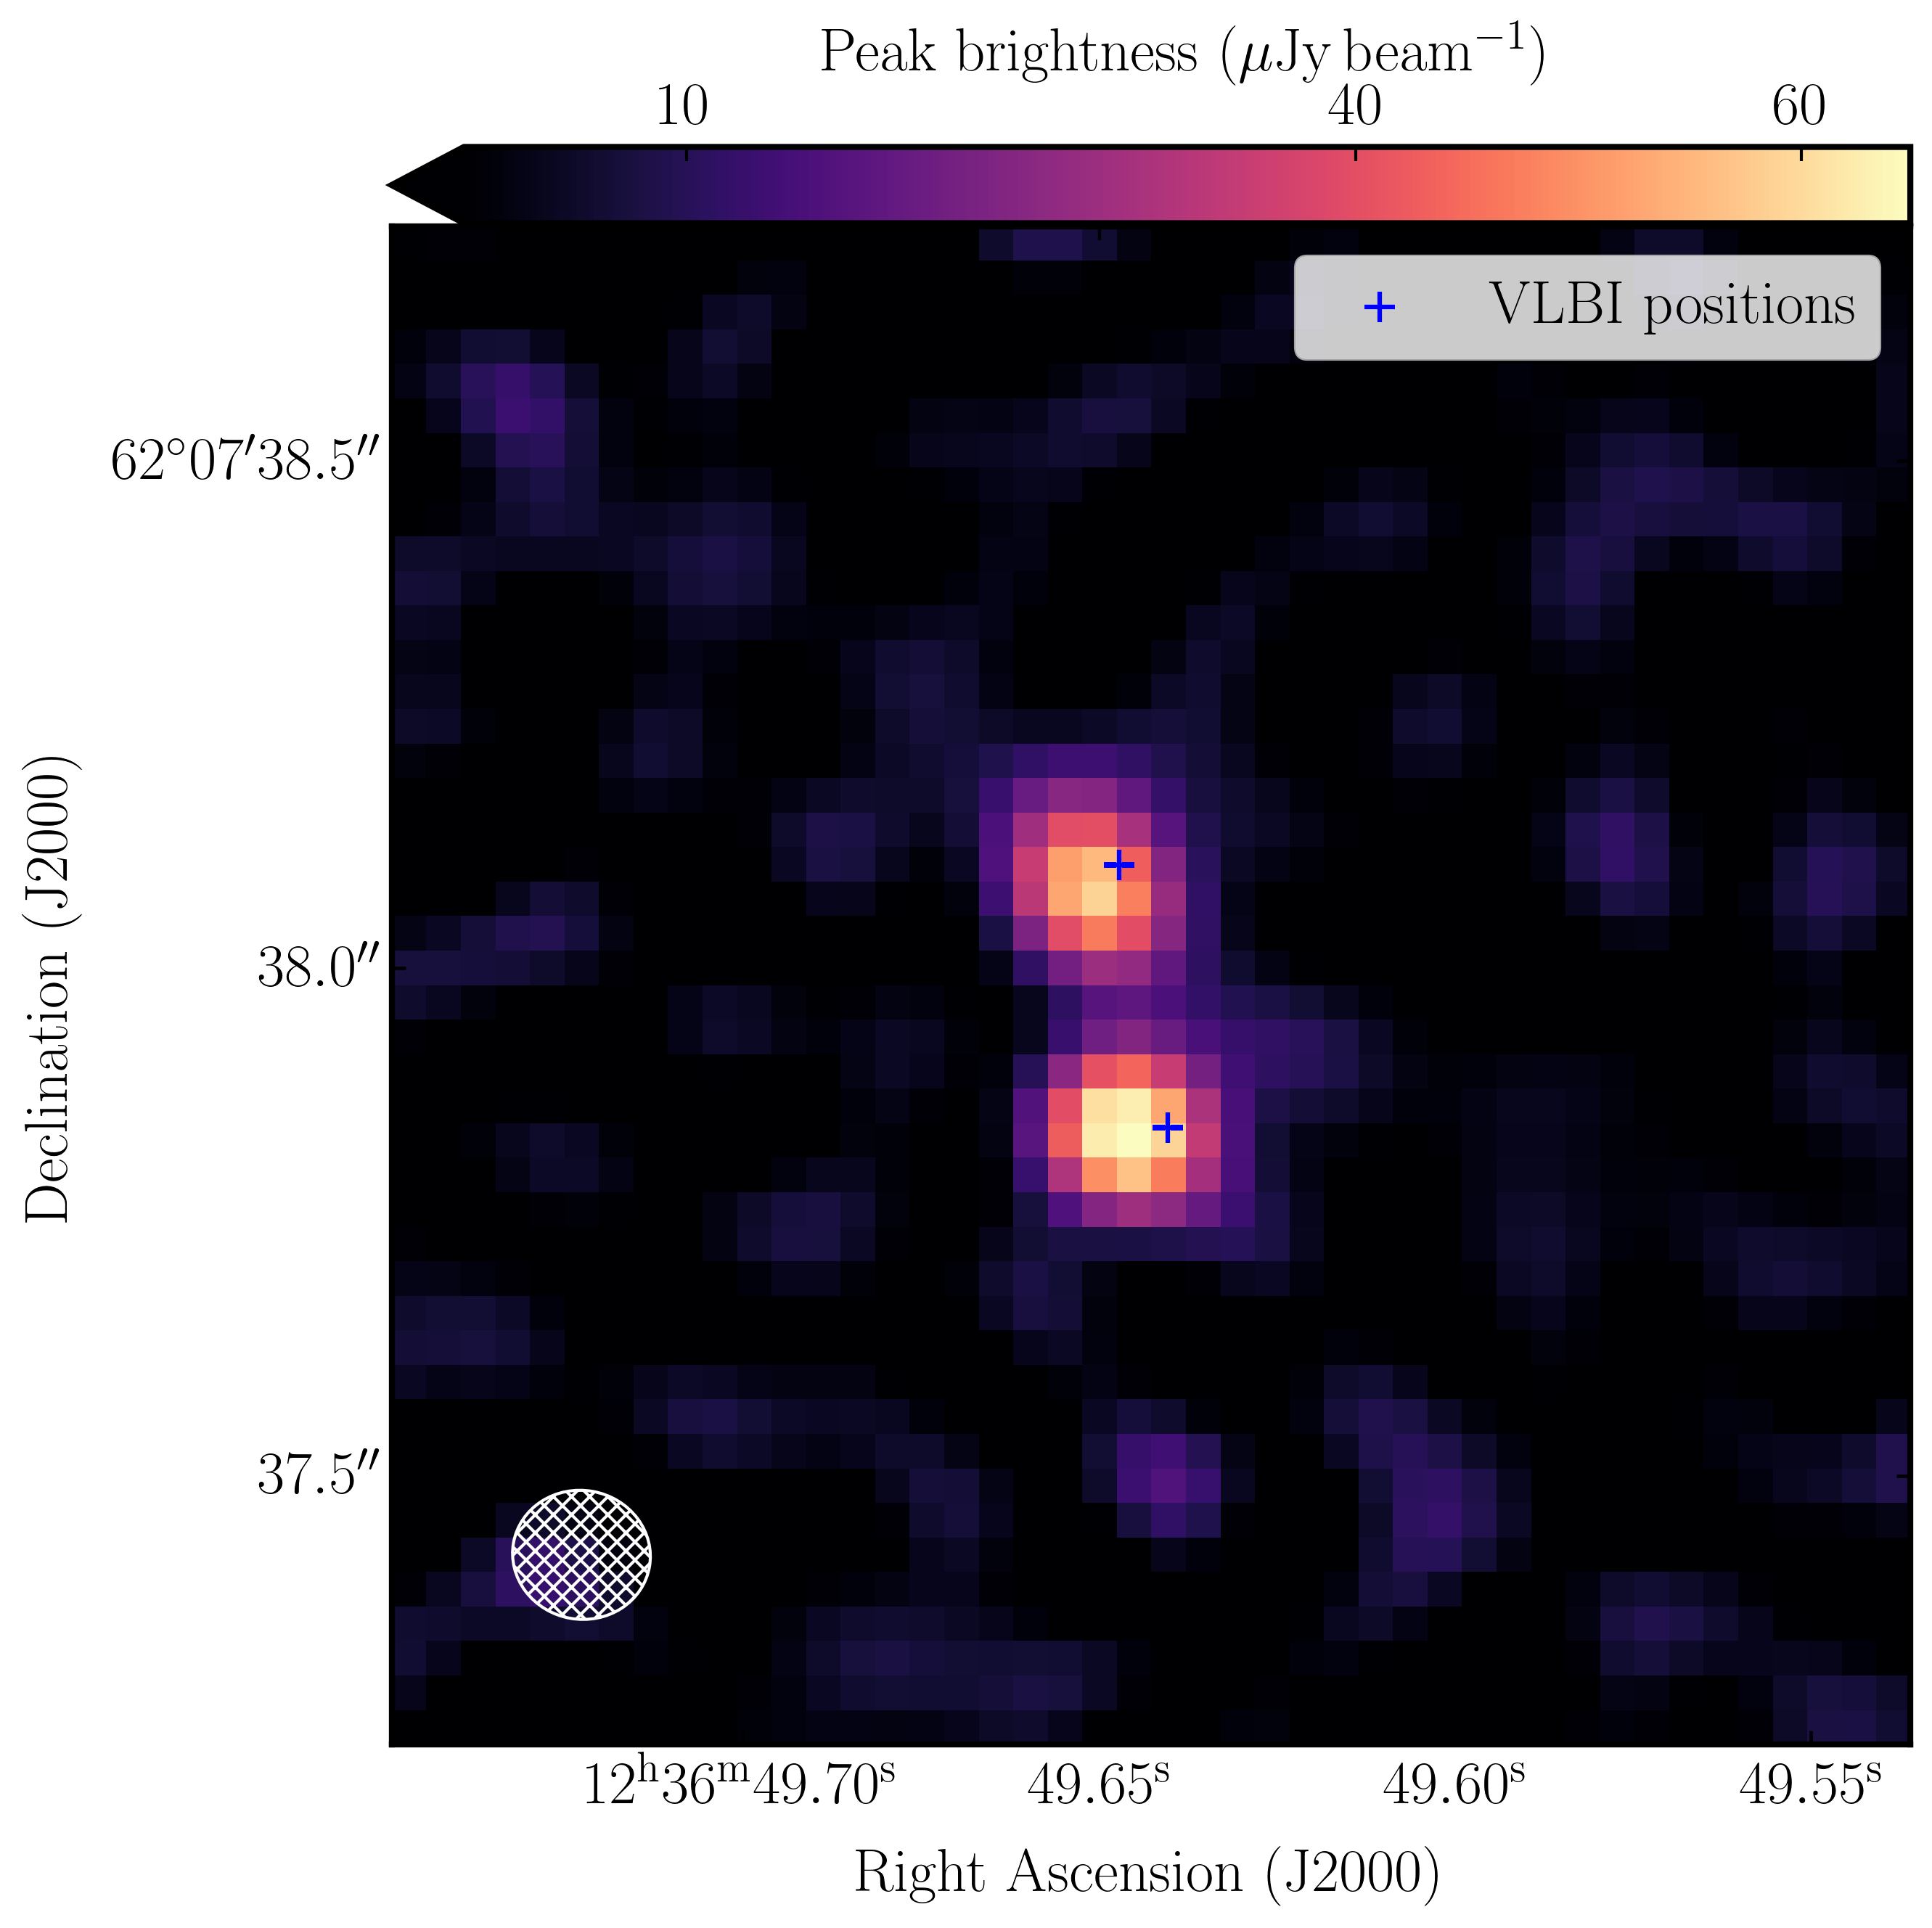

In [8]:
fig = plt.figure(figsize=(9,9.55))
gs = gridspec.GridSpec(nrows=2,ncols=1,height_ratios=[1/20,1],hspace=0,wspace=0)

ax = fig.add_subplot(gs[1],projection=cutout_em.wcs)
im = ax.imshow(cutout_em.data*1e6,norm=colors.SymLogNorm(linthresh=60,vmin=0, base=10))

## add the beam info
ycen_pix, xcen_pix = 5, 5
pixscale = hdu[0].header['CDELT2'] * u.deg
ellipse_artist = beam.ellipse_to_plot(xcen_pix, ycen_pix, pixscale,fill=False,hatch='xxxx',ec='w')
ax.add_artist(ellipse_artist)

## add the VLBI locations
ax.scatter(vn.ra.deg,vn.dec.deg,transform=ax.get_transform('world'),c='b',marker='+',s=100)
ax.scatter(vs.ra.deg,vs.dec.deg,transform=ax.get_transform('world'),c='b',marker='+',s=100,label='VLBI positions')
ax.legend(facecolor="w")
## add the labels
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)')

## add the colourbar
cax = fig.add_subplot(gs[0])
cb = plt.colorbar(mappable=im,cax=cax,location='top',extend='min')
cax.set_xlabel('Peak brightness ($\mathrm{\mu Jy\,beam^{-1}}$)')
cax.set_xticks([10,40,60])
cax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
fig.savefig('emerlinR0.25_VLBI.pdf',dpi=150)
plt.show()

#### HST images

##### with emerlin and vlbi

In [9]:
hdu = fits.open(impath+"HSTdata/hst_F125W_BSMBH.fits")
c = SkyCoord("12h36m49.6425s","+62d07m37.984s")
cutout = Cutout2D(data=hdu[0].data.squeeze(),position=c,size=3.5*u.arcsecond,wcs=WCS(hdu[0].header))
hdu.close()

In [10]:
cutout.data.min()

np.float32(-0.02038429)

<>:19: SyntaxWarning: invalid escape sequence '\,'
<>:19: SyntaxWarning: invalid escape sequence '\,'
/var/folders/95/2mdwxkv53dg0z1fx0__lvyxw0000gq/T/ipykernel_35568/2743848149.py:19: SyntaxWarning: invalid escape sequence '\,'
  cax.set_xlabel('Flux ($e^-\,\mathrm{s^{-1}}$)')
/Users/jackradcliffe/venv/lib/python3.13/site-packages/astropy/visualization/wcsaxes/core.py:258: UserWarning: The following kwargs were not used by contour: 'lw', 'label'
  cset = super().contour(*args, **kwargs)


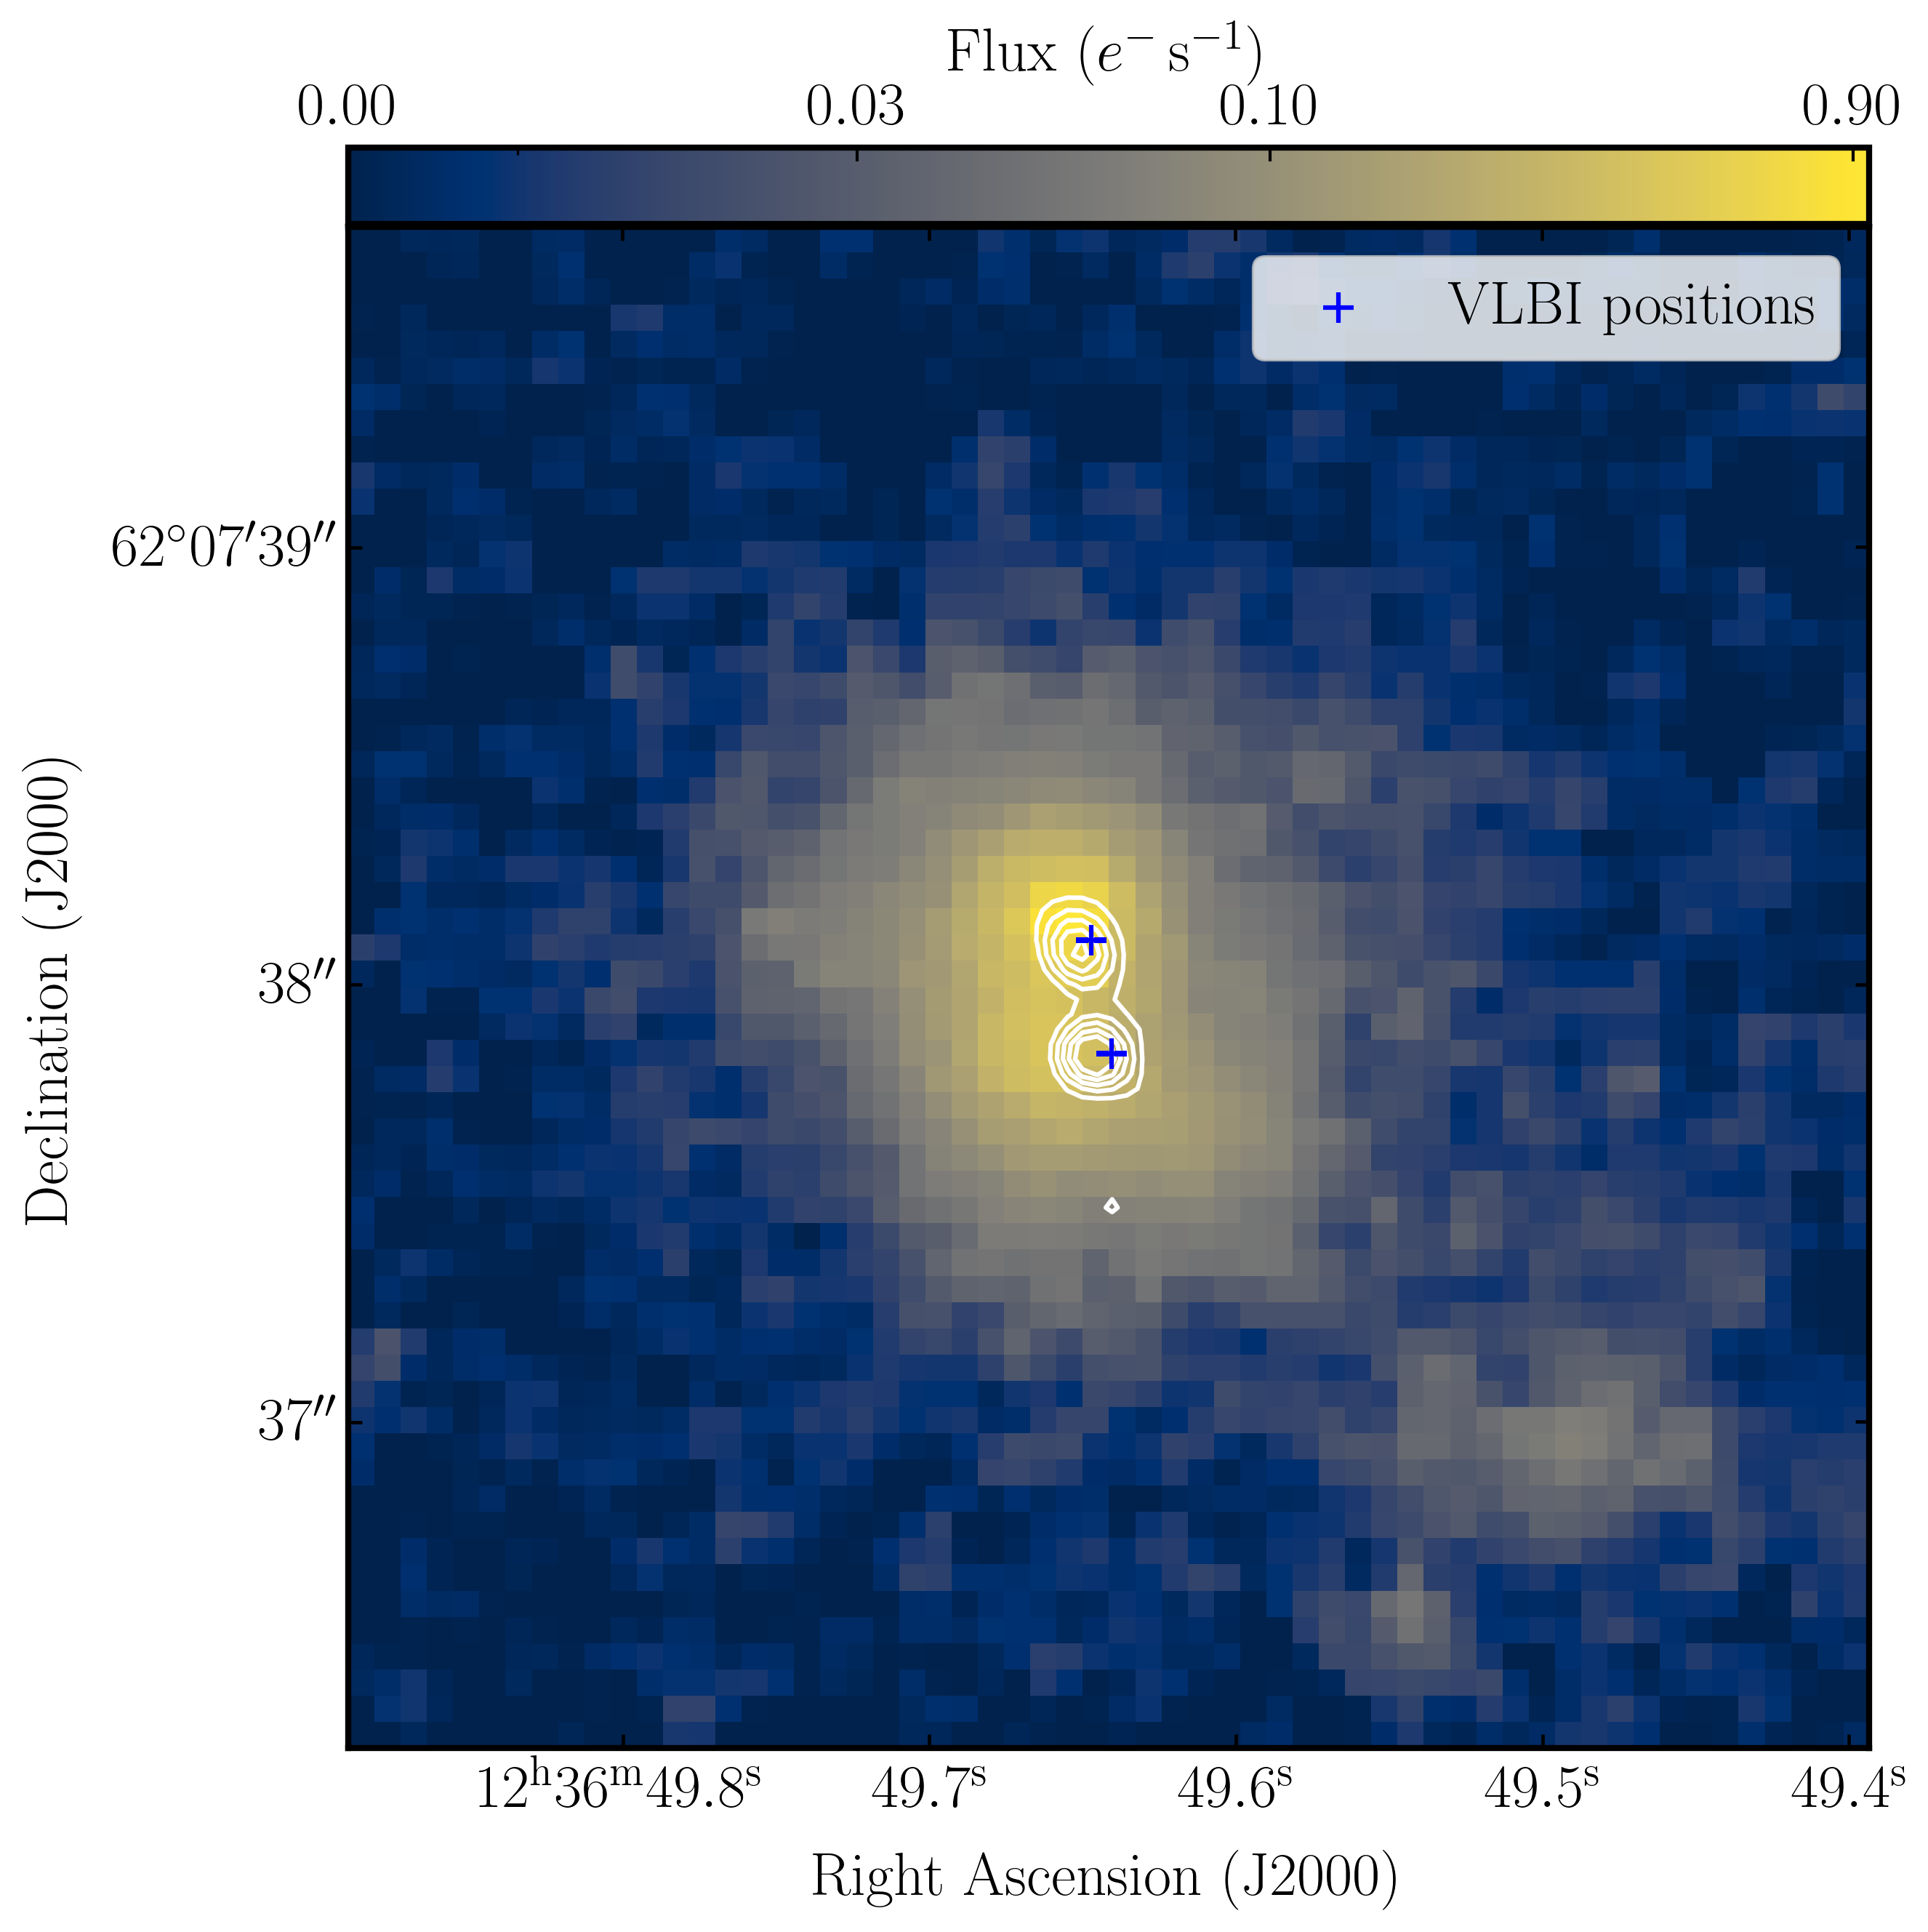

In [11]:
fig = plt.figure(figsize=(9,9.55))
gs = gridspec.GridSpec(nrows=2,ncols=1,height_ratios=[1/20,1],hspace=0,wspace=0)

ax = fig.add_subplot(gs[1],projection=cutout.wcs)
im = ax.imshow(cutout.data, norm=colors.SymLogNorm(linthresh=4e-2,vmin=0, base=10),cmap='cividis')

ax.contour(cutout_em.data*1e6,levels=[15,25,35,45,55],colors='w',transform=ax.get_transform(cutout_em.wcs),lw=0.1,label='e-MERLIN')
ax.scatter(vn.ra.deg,vn.dec.deg,transform=ax.get_transform('world'),c='b',marker='+',s=100,zorder=100)
ax.scatter(vs.ra.deg,vs.dec.deg,transform=ax.get_transform('world'),c='b',marker='+',s=100,label='VLBI positions',zorder=100)
ax.legend(facecolor="w")

## add the labels
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)')

## add the colourbar
cax = fig.add_subplot(gs[0])
cb = plt.colorbar(mappable=im,cax=cax,location='top')
cax.set_xlabel('Flux ($e^-\,\mathrm{s^{-1}}$)')
cax.set_xticks([0,0.03,0.1,0.9])
cax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
fig.savefig('HST_emerlin_VLBI.pdf',dpi=150)
plt.show()

##### all wavelengths

In [12]:
!ls ../vdDussen_MSc_plots/HSTdata/

hst_F125W_BSMBH.fits  hst_F435W_BSMBH.fits  hst_F850LP_BSMBH.fits
hst_F140W_BSMBH.fits  hst_F606W_BSMBH.fits
hst_F160W_BSMBH.fits  hst_F775W_BSMBH.fits


In [13]:
#for i in os.listdir('../vdDussen_MSc_plots/HSTdata/'):
photplam = {"F435W":4329.9,"F606W":5921.9,"F775W":7693.5, "F850LP":9031.5,"F160W":15369.176,"F125W":12486.060,"F140W":13922.907}
photplam = dict(sorted(photplam.items(), key=lambda item: item[1]))
p_keys = list(photplam.keys())
for i in os.listdir('../vdDussen_MSc_plots/HSTdata/'):
    hdu=fits.open('../vdDussen_MSc_plots/HSTdata/'+i)
    print("File: %s, Wavelength: %.3f"%(i,np.round(hdu[0].header['PHOTPLAM'],3)))

File: hst_F160W_BSMBH.fits, Wavelength: 15369.176
File: hst_F435W_BSMBH.fits, Wavelength: 0.000
File: hst_F606W_BSMBH.fits, Wavelength: 0.000
File: hst_F850LP_BSMBH.fits, Wavelength: 0.000
File: hst_F775W_BSMBH.fits, Wavelength: 0.000
File: hst_F125W_BSMBH.fits, Wavelength: 12486.060
File: hst_F140W_BSMBH.fits, Wavelength: 13922.907


<>:18: SyntaxWarning: invalid escape sequence '\h'
<>:20: SyntaxWarning: invalid escape sequence '\,'
<>:22: SyntaxWarning: invalid escape sequence '\,'
<>:36: SyntaxWarning: invalid escape sequence '\,'
<>:18: SyntaxWarning: invalid escape sequence '\h'
<>:20: SyntaxWarning: invalid escape sequence '\,'
<>:22: SyntaxWarning: invalid escape sequence '\,'
<>:36: SyntaxWarning: invalid escape sequence '\,'
/var/folders/95/2mdwxkv53dg0z1fx0__lvyxw0000gq/T/ipykernel_35568/617748812.py:18: SyntaxWarning: invalid escape sequence '\h'
  add_scalebar(ax, 0.5*u.arcsec, label="0\hbox{$.\!\!^{\prime\prime}$5", color="white")
/var/folders/95/2mdwxkv53dg0z1fx0__lvyxw0000gq/T/ipykernel_35568/617748812.py:20: SyntaxWarning: invalid escape sequence '\,'
  label = '%s / $%.2f\,\mathrm{\mu m}$'%(p_keys[i],np.round(photplam[p_keys[i]]/1e4,2))
/var/folders/95/2mdwxkv53dg0z1fx0__lvyxw0000gq/T/ipykernel_35568/617748812.py:22: SyntaxWarning: invalid escape sequence '\,'
  label = '%s / $%d\,\mathrm{nm}$'%(p_

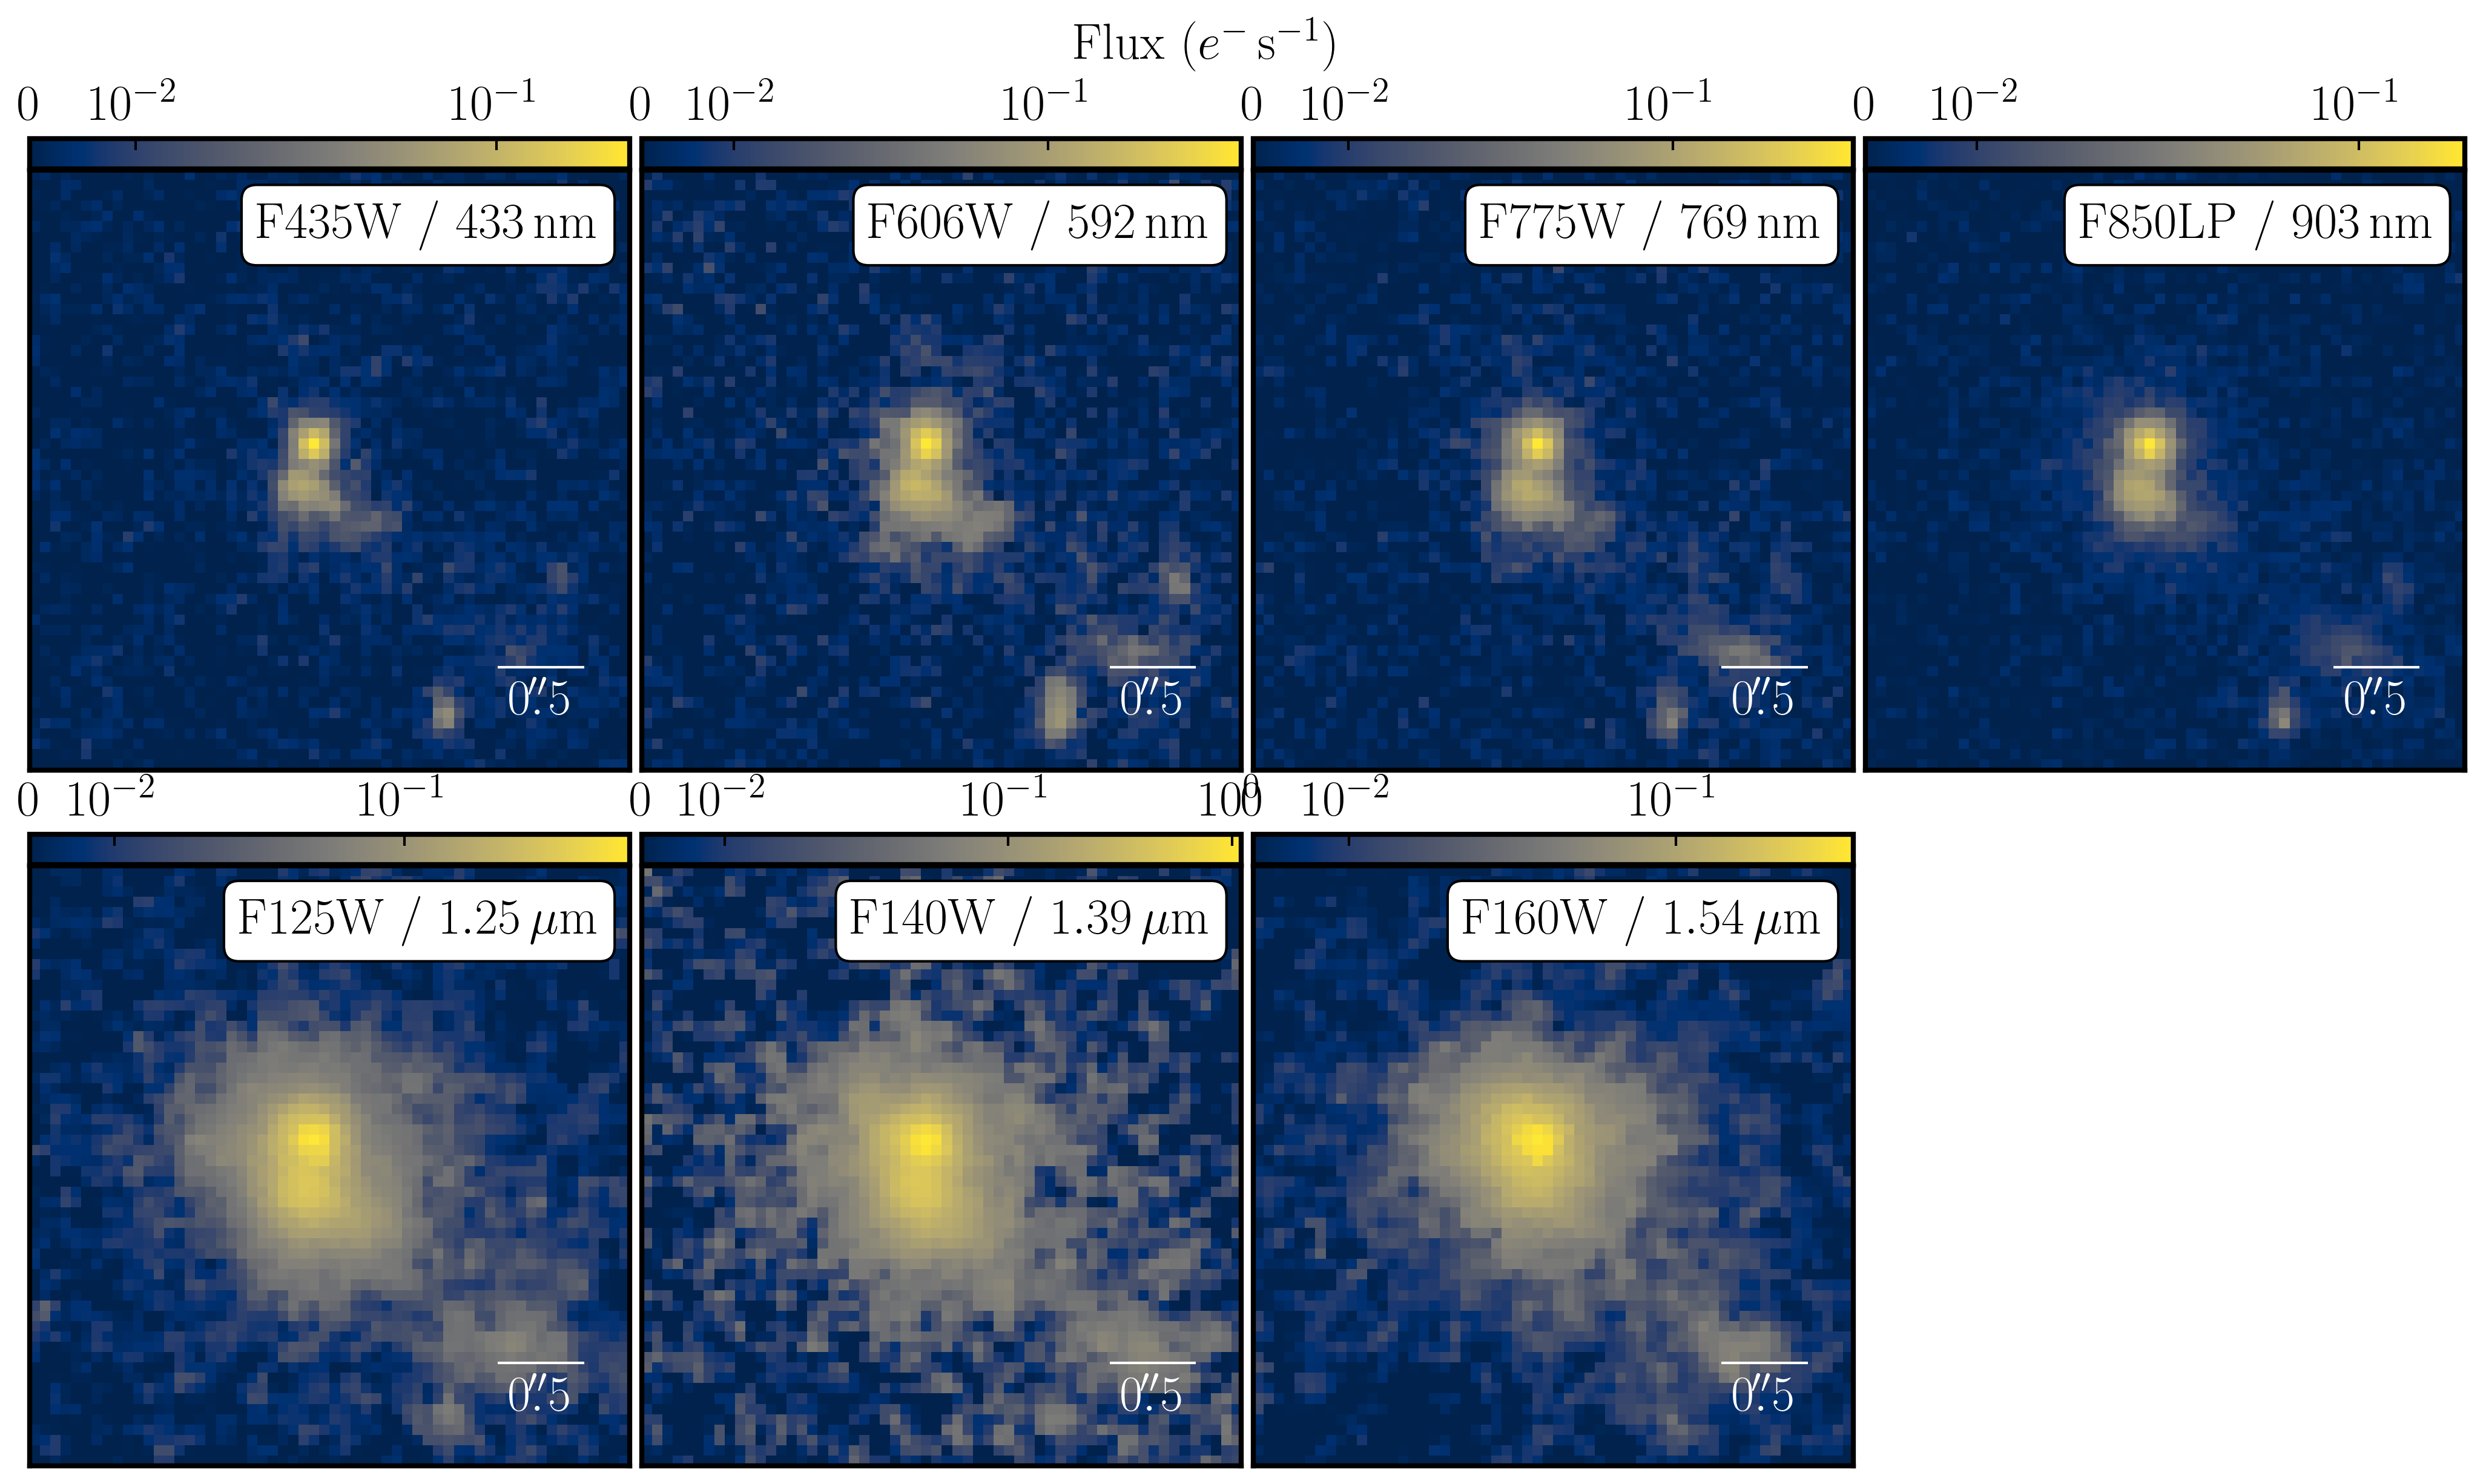

In [16]:
fig = plt.figure(figsize=(17.3,9.5))
gs = gridspec.GridSpec(nrows=2,ncols=1,hspace=0.1,wspace=0.0,height_ratios=[1,1])
gs0 = gs[0].subgridspec(nrows=2,ncols=4,hspace=0,wspace=0.02,height_ratios=[1/20,1])
gs1 = gs[1].subgridspec(nrows=2,ncols=4,hspace=0,wspace=0.02,height_ratios=[1/20,1])

for i in range(len(photplam)):
    hdu = fits.open(impath+"HSTdata/hst_%s_BSMBH.fits"%(p_keys[i]))
    c = SkyCoord("12h36m49.6425s","+62d07m37.984s")
    cutout = Cutout2D(data=hdu[0].data.squeeze(),position=c,size=3.5*u.arcsecond,wcs=WCS(hdu[0].header))
    hdu.close()
    if i < 4:
        ax = fig.add_subplot(gs0[1,i%4],projection=cutout.wcs)
        cax = fig.add_subplot(gs0[0,i%4])
    else:
        ax = fig.add_subplot(gs1[1,i%4],projection=cutout.wcs)
        cax = fig.add_subplot(gs1[0,i%4])
    im = ax.imshow(cutout.data, norm=colors.SymLogNorm(linthresh=3e-2,vmin=0, base=10),cmap='cividis')
    add_scalebar(ax, 0.5*u.arcsec, label="0\hbox{$.\!\!^{\prime\prime}$5", color="white")
    if photplam[p_keys[i]] > 1e4:
        label = '%s / $%.2f\,\mathrm{\mu m}$'%(p_keys[i],np.round(photplam[p_keys[i]]/1e4,2))
    else:
        label = '%s / $%d\,\mathrm{nm}$'%(p_keys[i],np.round(photplam[p_keys[i]]/10,0))
    ax.text(0.95,0.95,label,bbox=dict(facecolor='w', edgecolor='black', boxstyle='round'),\
            ha='right',va='top',transform=ax.transAxes)
    lon = ax.coords[0]
    lat = ax.coords[1]
    lon.set_ticks_visible(False)
    lon.set_ticklabel_visible(False)
    lat.set_ticks_visible(False)
    lat.set_ticklabel_visible(False)
    lon.set_axislabel('')
    lat.set_axislabel('')
    
    cb = plt.colorbar(mappable=im,cax=cax,location='top')

fig.text(0.5,0.95,'Flux ($e^-\,\mathrm{s^{-1}}$)',ha='center',va='top')
fig.savefig('HST_allbands.pdf',dpi=150)
plt.show()